# Import libraries

In [146]:
from utils import generate_samples_linear_reg
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

# Generate sample

In [170]:
# Sample data from population which is linearly distributed

samples = 5000
features = 13
lower_bound = 0
upper_bound = 0.5
intercept = 10
coeffecients = [20,10,13,45,4,-89,-12,-7,9,280,-500,130,1000]
sigma = 40

X, y = generate_samples_linear_reg(
    samples,
    features,
    lower_bound,
    upper_bound,
    intercept,
    coeffecients,
    sigma
)

print("Shape of samples is: ",X.shape)
# print("Samples are: ", X)

print("\n Shape of labels is: ",y.shape)
# print("Labels are: ", y)



Shape of samples is:  (5000, 13)

 Shape of labels is:  (5000,)


In [171]:
# Plot of samples - To verify linearity assumption

# plt.scatter(X,y)
# plt.xlabel("Feature")
# plt.ylabel("Label")
# plt.show()


# Train model

In [172]:
# Train linear regression model

X_with_intercept = sm.add_constant(X)
model = sm.OLS(y,X_with_intercept)
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     6299.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:51:56   Log-Likelihood:                -25589.
No. Observations:                5000   AIC:                         5.121e+04
Df Residuals:                    4986   BIC:                         5.130e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5536      3.627      2.634      0.008       2.443      16.664
x1            18.6939      3.939      4.746      0.000      10.972      26.416
x2            10.4189      3.957      2.633      0.008       2.662      18.176
x3            10.1785      3.945      2.580      0.010       2.445      17.912
x4            51.0841      3.995     12.786      0.000      43.251      58.917
x5             0.4749      3.925      0.121      0.904      -7.220       8.170
x6           -96.7788      3.972    -24.363      0.000    -104.566     -88.991
x7           -16.6322      3.989     -4.170      0.000     -24.452      -8.813
x8            -5.4520      3.982     -1.369      0.171     -13.258       2.354
x9            12.2712      3.965      3.095      0.002       4.499      20.044
x10          282.3978      3.950     71.488      0.000     274.653     290.142
x11         -494.2593      3.954   -124.991      0.000    -502.012    -486.507
x12          135.6096      4.012     33.802      0.000     127.744     143.475
x13          996.3028      4.041    246.565      0.000     988.381    1004.224
==============================================================================
Omnibus:                        0.300   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.861   Jarque-Bera (JB):                0.312
Skew:                          -0.019   Prob(JB):                        0.856
Kurtosis:                       2.990   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prediction

In [173]:
# Predictions

y_pred = model_results.predict(X_with_intercept)
mean_squared_error = np.mean((y - y_pred) ** 2)
print("Mean squared error is: ",mean_squared_error)
print("Estimated standard deviation in errors is (Square root of mean squared error of fitted model): ",
      np.sqrt(len(y)*mean_squared_error/(len(y)-X.shape[1]-1)))
print("Actual standard deviation in errors is: ", sigma)

# Plot of actual and predicted labels

# plt.scatter(X,y,color='r',label='Actual')
# plt.plot(X,y_pred,color='g',label='Predicted')
# plt.xlabel("Feature")
# plt.ylabel("Label")
# plt.title("Prediction vs Actual plot")
# plt.legend()
# plt.show()


Mean squared error is:  1631.9982828803718
Estimated standard deviation in errors is (Square root of mean squared error of fitted model):  40.454674746748296
Actual standard deviation in errors is:  40


# Diagnostic plots

In [174]:
# Get leverage points and influence points in sample. These will be used to plot graphs.
# Leverage points - These are points (X) than are far away from mean (X_mean)
# Influence points - These are the points (X) which have large influence on the fit of the model.

influence = model_results.get_influence() 
leverage = influence.hat_matrix_diag 

Min error is:  -138.3891840947132
Max error is:  142.21917572333905
Mean of errors is:  0.0


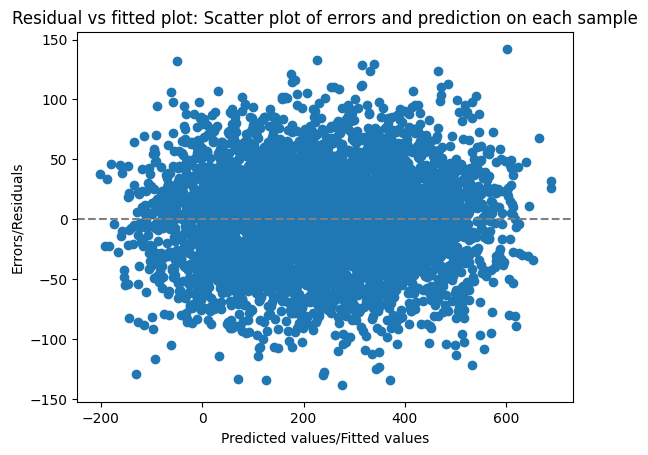

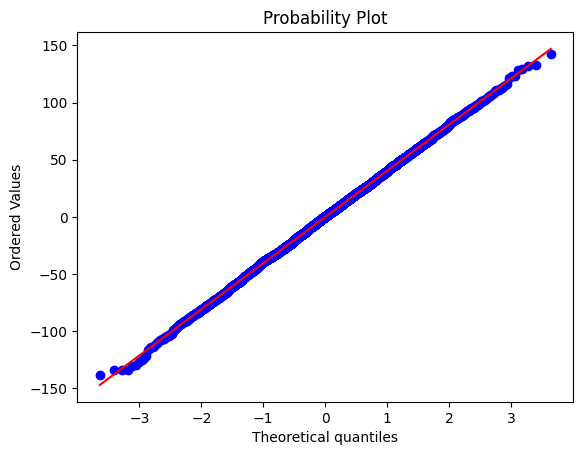

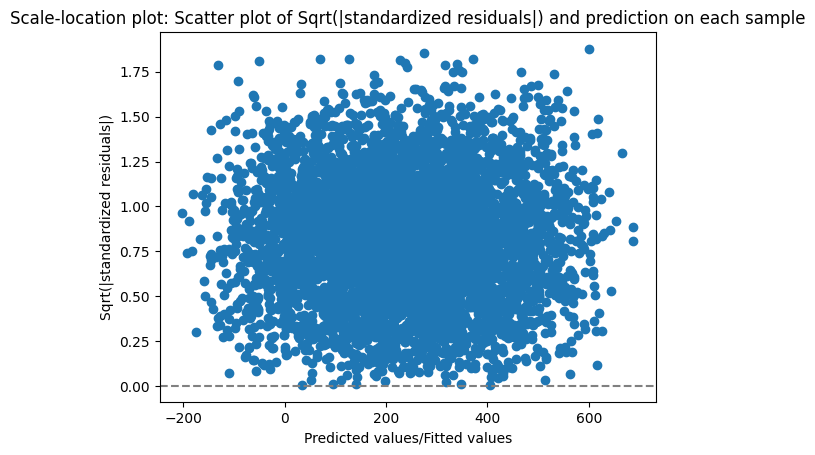

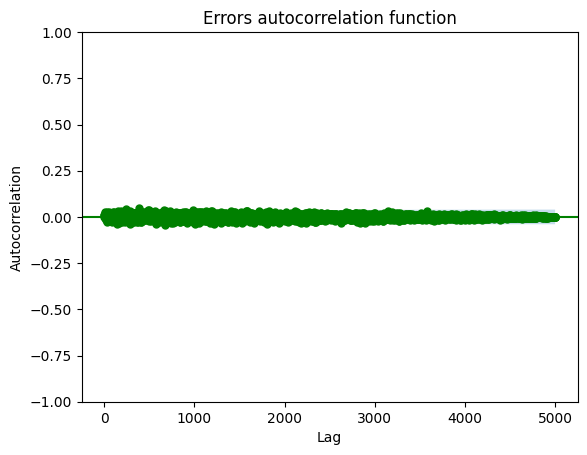

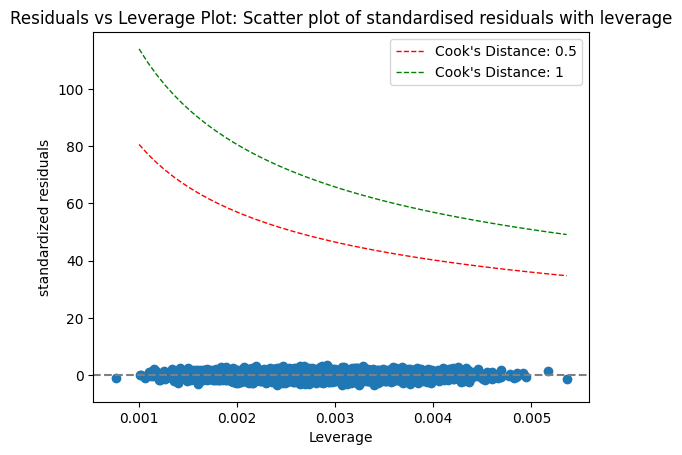

<Figure size 1200x1200 with 0 Axes>

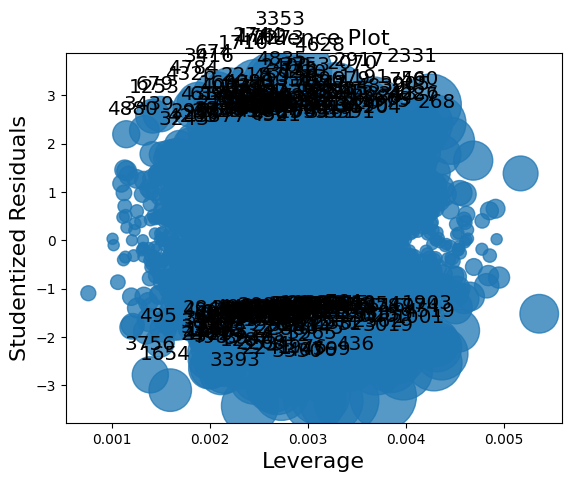

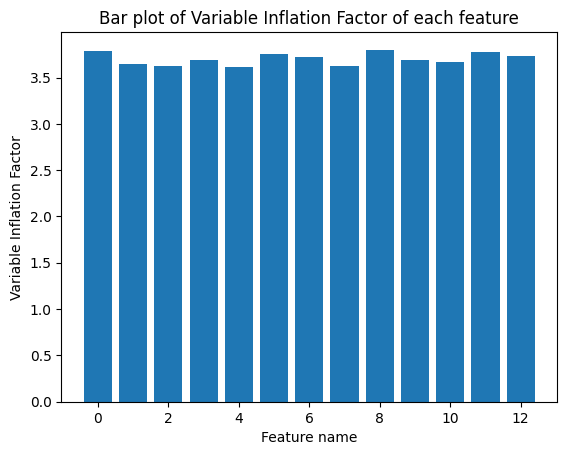

In [175]:
# Plot of errors

errors = y-y_pred
errors_standardized = (errors-np.mean(errors))/np.std(errors,ddof=2)
errors_standardized_abs_sqrt = np.sqrt(np.absolute((errors-np.mean(errors)))/np.std(errors,ddof=2))

# Error Statistics - To check mean of errors

print("Min error is: ",np.min(errors))
print("Max error is: ",np.max(errors))
print("Mean of errors is: ",round(np.mean(errors),2))

# Residual vs fitted plot - To check linearity and homoscedasticity

plt.scatter(y_pred,errors)
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel("Predicted values/Fitted values")
plt.ylabel("Errors/Residuals")
plt.title("Residual vs fitted plot: Scatter plot of errors and prediction on each sample")
plt.show()

# Histogram of errors - To check Normality

# plt.hist(errors, bins=samples//5)
# plt.xlabel("Error")
# plt.ylabel("Frequency")
# plt.title("Histogram of errors")
# plt.show()

# Error Q-Q plot - To check normality

stats.probplot(errors, dist="norm", plot=plt)
plt.show() 


# Error scatter plot - To check homoscedasticity

# plt.scatter(X,errors)
# plt.axhline(y=0, color='grey', linestyle='dashed') 
# plt.xlabel("Feature")
# plt.ylabel("Error")
# plt.title("Scatter plot of error on each sample")
# plt.show()

# Scale-location plot - To check homoscedasticity

plt.scatter(y_pred,errors_standardized_abs_sqrt)
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel("Predicted values/Fitted values")
plt.ylabel("Sqrt(|standardized residuals|)")
plt.title("Scale-location plot: Scatter plot of Sqrt(|standardized residuals|) and prediction on each sample")
plt.show()

# Error autocorrelation plot - To check independence of errors

tsaplots.plot_acf(errors, color='g', lags=np.arange(1,len(errors)),title='Errors autocorrelation function')
# tsaplots.plot_acf(errors, color='g', lags=np.arange(1,100),title='Errors autocorrelation function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Residual vs leverage plot: To check linearity, heteroskedasticity and outliers
cook_distance = model_results.get_influence().cooks_distance[0]
    # Plot cook's line of 0.5
x_values = np.linspace(0.001, max(leverage), 50)
y_values = np.apply_along_axis(lambda x: np.sqrt((0.5 * X.shape[1] * (1 - x)) / x),axis=0,arr=x_values)
plt.plot(x_values, y_values, label="Cook's Distance: 0.5", lw=1, ls='--', color='red')
    # Plot cook's line of 1
x_values = np.linspace(0.001, max(leverage), 50)
y_values = np.apply_along_axis(lambda x: np.sqrt((1 * X.shape[1] * (1 - x)) / x),axis=0,arr=x_values)
plt.plot(x_values, y_values, label="Cook's Distance: 1", lw=1, ls='--', color='green')

plt.scatter(leverage, errors_standardized) 
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel('Leverage') 
plt.ylabel('standardized residuals') 
plt.title('Residuals vs Leverage Plot: Scatter plot of standardised residuals with leverage') 
plt.legend()
plt.show()

# Plot Cook's distance plot: To check linearity, heteroskedasticity and outliers
plt.figure(figsize=(12,12))
sm.graphics.influence_plot(model_results, criterion="cooks") 
plt.show()
# The numbers in the output of this graph indicate sample index numbers which are influential


# Variable inflation factor: To check multicollinearity
vif = pd.DataFrame()
X_df=pd.DataFrame(X)
vif["variables"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values,i) for i in range(X.shape[1])]
plt.bar(x=vif["variables"],height=vif["VIF"])
plt.xlabel("Feature name")
plt.ylabel("Variable Inflation Factor")
plt.title("Bar plot of Variable Inflation Factor of each feature")
plt.show()
